In [650]:
import numpy as np

class PolynomialRegressor:
    def __init__(self):
        pass
    
    def predict(self, X) -> np.ndarray: 
        X = np.insert(X, 0, 1, axis=1)
        for i in range(degree-1):
            X = np.insert(X, X.shape[1], X[:, 1] ** (i+2), axis=1)
        return X @ self.weights
    
    def fit(self, X, Y, degree=1, GD=False, plot=False) -> None:
        """
        X: shape is (m, n)

        Y: shape is (m, 1)
        
        where 
            m is the number of data points
            n is the number of features   
        
        """
        X = np.insert(X, 0, 1, axis=1) # Insert ones column (X₀)
        for i in range(degree-1):
            X = np.insert(X, X.shape[1], X[:, 1] ** (i+2), axis=1)
        m, n = X.shape
        weights = np.random.rand(n).reshape(n, 1)
        step = .0000001
        numIteration = 3000
        history = []
        
        cost = lambda: ( (X @ weights - Y) ** 2).mean()
        
        # Gradient Descent
        if GD:
            for _ in range(numIteration):
                for x, y in zip(X, Y):
                    x = x.reshape(1, n)
                    weights = weights - step * 1/m * (x @ weights - y) * x.T
                history.append(cost())
        # Normal Equation
        else:
            weights = np.linalg.inv(X.T @ X) @ X.T @ Y
        
        print(f"Loss:\t{cost()}\nHistory:\t{history[::100]}\nWeights:\n{weights}")
        
        if plot:
            fig, ax = plt.subplots(2, figsize=(18, 16), dpi=80)
            ax[0].plot(history)
            ax[1].scatter(X[:, 1], X @ weights, color='red')
            ax[1].scatter(X[:, 1], Y, color='blue')
            plt.show()
            
        self.degree = degree
        self.weights = weights
        return weights

In [651]:
import matplotlib.pyplot as plt

In [652]:
m = 100
X = np.array(list(range(-m//2, m//2))).reshape(m, 1)
Y = X * X * np.random.rand(m).reshape(m, 1)

In [653]:
ln = PolynomialRegressor()

Loss:	105079.7616519091
History:	[221596.59290479857, 105398.42304378495, 105384.70144561044, 105371.20334919989, 105357.92676435832, 105344.86804320346, 105332.02359802315, 105319.38990028788, 105306.96347967371, 105294.74092310123, 105282.71887379052, 105270.89403033163, 105259.2631457704, 105247.8230267095, 105236.57053242419, 105225.50257399272, 105214.61611344114, 105203.90816290211, 105193.37578378785, 105183.01608597646, 105172.82622701183, 105162.80341131681, 105152.94488941933, 105143.24795719105, 105133.70995509923, 105124.32826747015, 105115.1003217653, 105106.02358786933, 105097.09557738961, 105088.31384296768]
Weights:
[[0.11296121]
 [0.76215108]
 [0.46113689]]


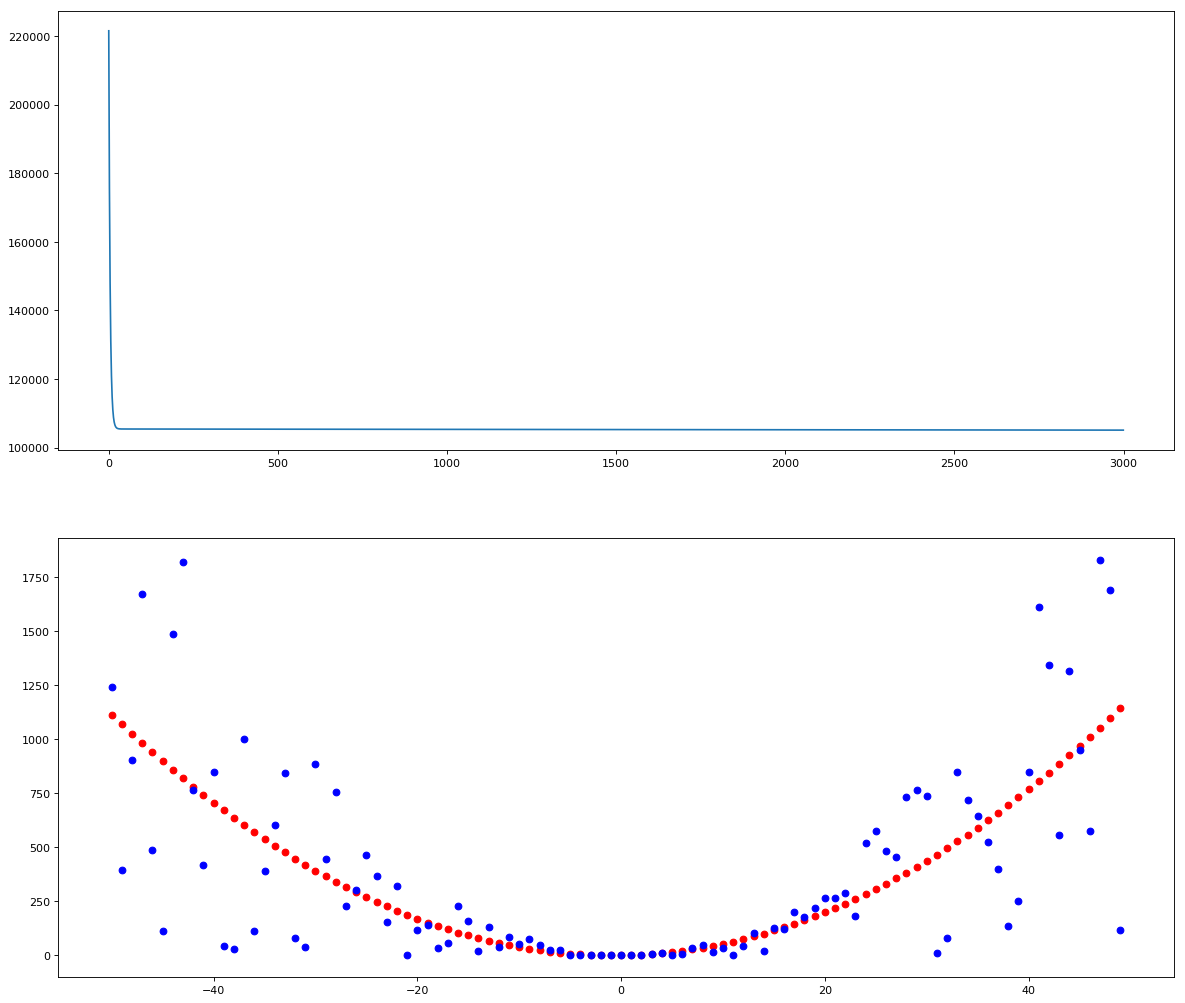

In [660]:
res = ln.fit(X, Y, degree=2, plot=True, GD=True)

In [624]:
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures

In [665]:
polyreg=make_pipeline(PolynomialFeatures(2),LinearRegression()).fit(X, Y)

In [666]:
((polyreg.predict(X) - Y) ** 2).mean()

104337.88927389706

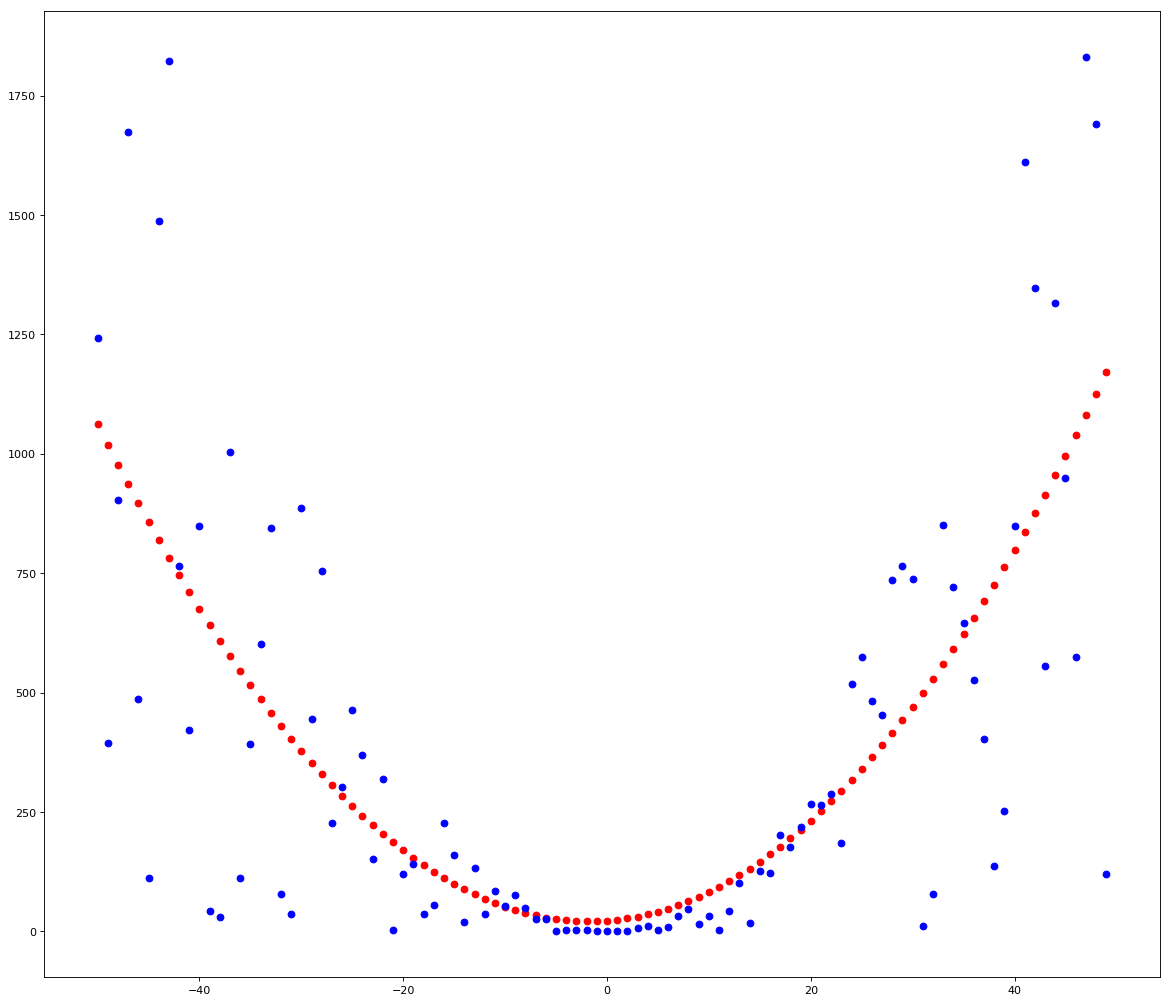

In [667]:
fig, ax = plt.subplots(1, figsize=(18, 16), dpi=80)
ax.scatter(X, polyreg.predict(X), color='red')
ax.scatter(X, Y, color='blue')
plt.show()